# Remote Work Health Analysis

### 1. Project Background

This Exploratory Data Analysis project seeks to uncover the relationship between an employee's work arrangement (Remote, Hybrid, Onsite) and their overall well-being in a post-pandemic era.

In order to simulate real-world data quality challenges, the dataset has been purposefully augmented to include more observations and to also include missing values, formatting issues as well as inconsistent values. The original dataset from Kaggle can be found [here](https://www.kaggle.com/datasets/pratyushpuri/remote-work-health-impact-survey-2025/data).

#### Table of Contents

- [1. Project Background](#1-project-background)
- [2. Importing Packages and Setup](#2-importing-packages-and-setup)
- [3. Data Loading and Overview](#3-data-loading-and-overview)
- [4. Data Quality Assessment](#4-data-quality-assessment)
- [5. Data Cleaning](#5-data-cleaning)
- [6. Research Analysis](#6-research-analysis)

### 2. Importing Packages and Setup

In [233]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os

sys.path.append('..')
from src import standardize_lower_case, clear_trailing_spaces, remove_characters, has_mental_health_concerns, impute_by_grouped_median

sns.set_context("talk")

### 3. Data Loading and Overview

In [234]:
# Loading the raw augmented dataset
df_raw = pd.read_csv("../data/remote_work_health_dataset_augmented_raw.csv")
# df_raw = pd.read_csv("../data/post_pandemic_remote_work_health_impact_2025_raw.csv")

df_raw.head()

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
0,2025-06-01,27.0,Female,Asia,Professional Services,Data Analyst,Onsite,64.0,Stress Disorder,High\n,3.0,Shoulder Pain; Neck Pain,Level 2.0,$40K-60K
1,2025-06-01,37.0,Female,Asia,Professional Services,Data Analyst,Onsite,37.0,NaN,High,NaN,Back Pain,2.0,$80K-100K
2,2025-06-01,90.0,Female,Africa,Education\n,Business Analyst,Onsite,36.0,NaN,High,3.0,Shoulder Pain; Eye Strain,2.0,$80K-100K
3,2025-06-01,40.0,Female,Europe,Education,Data Analyst,Onsite,63.0,ADHD,Medium,1.0,Shoulder Pain; Eye Strain,2.0,$60K-80K
4,2025-06-01,30.0,Male\n,South America,Manufacturing,DevOps Engineer,Hybrid,65.0,NaN,Medium,5.0,NaN,4.0,$60K-80K


In [235]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5150 entries, 0 to 5149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Survey_Date              5150 non-null   object
 1   Age                      4889 non-null   object
 2   Gender                   5150 non-null   object
 3   Region                   5150 non-null   object
 4   Industry                 5150 non-null   object
 5   Job_Role                 5150 non-null   object
 6   Work_Arrangement         5150 non-null   object
 7   Hours_Per_Week           4845 non-null   object
 8   Mental_Health_Status     3691 non-null   object
 9   Burnout_Level            4894 non-null   object
 10  Work_Life_Balance_Score  4550 non-null   object
 11  Physical_Health_Issues   4394 non-null   object
 12  Social_Isolation_Score   4742 non-null   object
 13  Salary_Range             5150 non-null   object
dtypes: object(14)
memory usage: 563.4+ KB


In [236]:
df_raw.describe() # Not much significance as columns are of the "object" type

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
count,5150,4889,5150,5150,5150,5150,5150,4845,3691,4894,4550,4394,4742,5150
unique,180,139,72,47,136,157,78,121,87,53,66,158,59,67
top,2025-06-16,30.0,Female,North America,Technology,HR Manager,Onsite,35.0,Good,Medium,3.0,Back Pain,3.0,$60K-80K
freq,154,136,2071,972,800,280,1437,187,467,1262,1079,607,1019,933


In [237]:
df_raw.shape

(5150, 14)

### 4. Data Quality Assessment

In [238]:
# Assessing Missing Values

prop_missing_vals = pd.DataFrame({
    "Missing_Count" : df_raw.isnull().sum(),
    "Missing_Proportion" : (df_raw.isnull().sum() / len(df_raw)) * 100
}).sort_values("Missing_Proportion", ascending= False)

print(prop_missing_vals)

                         Missing_Count  Missing_Proportion
Mental_Health_Status              1459           28.330097
Physical_Health_Issues             756           14.679612
Work_Life_Balance_Score            600           11.650485
Social_Isolation_Score             408            7.922330
Hours_Per_Week                     305            5.922330
Age                                261            5.067961
Burnout_Level                      256            4.970874
Survey_Date                          0            0.000000
Gender                               0            0.000000
Region                               0            0.000000
Industry                             0            0.000000
Job_Role                             0            0.000000
Work_Arrangement                     0            0.000000
Salary_Range                         0            0.000000


### Missing Data Analysis

**Mental_Health_Status** : 28.3% missing values (1459 records)
- This is likely caused by the respondees privacy when it comes to disclosing their personal mental health issues. However, it is also worth considering that some of those surveyed may not have a diagnosis for mental health issues and do not have any ongoing health concerns to report.

**Physical_Health_Status** : 14.7% missing values (756 records)
- Similarly, this might be due to the respondees privacy in their unwillingness to share their physical health history. Alternatively, they may not be experiencing any physical health issues and have no data to report. 

**Work_Life_Balance_Score** : 11.7 % missing values (600 records)
- Likely due to sensitive work-personal boundary topic. This would lead to a bias to respondees who have shared their work life balance scores.

The other columns have less than 10% of missing values and are still viable for Exploratory Data Analysis

In [239]:
# Assessing Invalid Data & Formatting Inconsistencies

print(df_raw["Age"].unique())
print("\n")
print(df_raw["Work_Arrangement"].unique())
print("\n")
print(df_raw["Social_Isolation_Score"].unique())
print("\n")
print(df_raw["Salary_Range"].unique())


['27.0' '37.0' '90.0' '40.0' '30.0' '52.0' '50.0' '63.0' '42.0' '64.0' nan
 '36.0' '57.0' '26.0' '55.0' '59.0' '23.0' '22.0' '25.0' '85.0' '47.0'
 '39.0' '62.0' '29.0' '31.0' '33.0' '50.0.00' '65.0' '58.0' '51.0' '41.0'
 '44.0' '53.0' '48.0' '49.0' '56.0' '28.0' '60.0' '43.0' '38.0' '46.0'
 '45.0' '24.0' '61.0' '32.0' '35.0' 'Age 40.0' '34.0' '43.0.0' '16.0'
 '54.0' '62.0pts' '35.0+' ' 50.0 ' '17.0' 'Age 37.0' '46.0.00' '25.0.0'
 '62.0.0' '59.0.00' ' 42.0 ' '55.0pts' '54.0.0' '(45.0)' '38.0pts'
 '50.0.0' '150.0' '57.0.00' '54.0pts' '53.0pts' '41.0pts' 'Age 41.0'
 '47.0pts' '1995.0' ' 46.0 ' 'Age 29.0' '23.0.00' '0.0' 'Age 39.0'
 '(27.0)' '37.0.00' ' 38.0 ' '85.0.00' ' 56.0 ' '24.0.0' '48.0.0'
 '43.0pts' 'Age 35.0' ' 58.0 ' '48.0+' 'Age 23.0' '52.0pts' ' 40.0 '
 '15.0' '60.0.00' '27.0pts' '34.0+' ' 41.0 ' '(55.0)' '34.0.0' '37.0pts'
 ' 35.0 ' ' 39.0 ' '45.0+' '47.0.0' ' 53.0 ' '27.0.0' '29.0.00' 'Age 16.0'
 '(40.0)' '35.0.0' '49.0pts' ' 34.0 ' ' 63.0 ' '(31.0)' 'Age 43.0'
 ' 60.0 ' 'Age

### Data Formatting and Consistency Analysis

Investigation of the key data fields raises multiple issues with the data collected, which needs to be addressed during the data cleaning stage. 

**Trailing Spaces**: Columns have trailing whitespaces in their values as indicated by  `' '` as well as `\n` and `\t`.

**Capitalisation Inconsistency**: In particular, categorical columns have similar entries with inconsistent capitalisation: lower case, upper case, and both.

**Text Format Inconsistency**: Columns have unnecessary characters in their records such as "pts", "+" and "Age" in the `Age` column, which do not add any value to the analysis. Numeric columns have redundant decimal points in their values as well.

**Invalid Values**: Columns have invalid values that do not fall into the categories assigned, such as "Mixed" and "Flexible" in the `Work_Arrangement` column, which can only accept categories such as "Onsite", "Remote" or "Hybrid". Another class of invalid values are values that fall out of scale such as records that are greater than 5 in the `Social_Isolation_Score` column, or impossible values like "0.0" and "1995" in the `Age` column.

**Inconsistent Columns**: The `Salary_Range` column contains heavily overlapping and inconsistently defined salary brackets ("$40K-$60K" and "$50K-$70K"). Due to the ambiguity and challenge of standardising these ranges without introducing assumptions, this column was excluded from further analysis.


**Improper Column Type**: All columns belong to the `object` class and need to be typecasted to their respective classes for proper analysis.


In [240]:
# Checking for Duplicate Values
#print(df_raw[df_raw.duplicated()]
#print("\n")

# Counting Number and Proportion of Duplicate Values
print(df_raw.duplicated().sum())
print(df_raw.duplicated().sum() / len(df_raw) * 100)

19
0.36893203883495146


### Duplicate Record Analysis

Analysis of duplicate values found 19 entries in the entire dataset, which was likely due to survey adminstration errors. However, this would not have a significant impact on the analysis as these duplicate entries only account for 0.37% of the entire dataset.

### 5. Data Cleaning

### Addressing Duplicate Values

In [241]:
# Creating a copy of the df
df_copy = df_raw.copy()

df_copy.drop_duplicates(inplace= True)

As aforementioned, these duplicate entries are likely due to survey errors and are real duplicated values. Since this survey was performed on a global scale, it is highly unlikely that there are multiple individuals with the exact same personal particulars, with similar job information and scoring the metrics and presenting the same health issues. These duplicates serve no statistical significance in the analysis and can be dropped as they only constitute 0.37% of the dataset.

### Addressing Spacing and Capitalisation Inconsistency

In [242]:
df_copy = standardize_lower_case(df_copy)
df_copy = clear_trailing_spaces(df_copy)

### Addressing Text Format Inconsistencies and Invalid Values

#### Date Columns

In [243]:
# Formatting Date_Surveyed Column
#df_copy["Survey_Date"].unique()

df_copy = remove_characters(df_copy, "Survey_Date", " 00:00:00")
df_copy["Survey_Date"] = pd.to_datetime(df_copy["Survey_Date"])

Timestamp values " 00:00:00" were removed from each entry in the `Surveyed_Date` column as the only relevant component was the date component, not the time of day.

#### Numeric Columns

In [244]:
# Cleaning Age Column
#df_copy["Age"].unique()

df_copy = remove_characters(df_copy, "Age", "pts", "age ", "+", "(", ")")
df_copy["Age"] = df_copy["Age"].str.replace(r"\.0.00$", "", regex=True)
df_copy["Age"] = df_copy["Age"].str.replace(r"\.0.0$", "", regex=True)

df_copy["Age"] = pd.to_numeric(df_copy["Age"], errors="coerce")
df_copy.loc[(df_copy["Age"] < 18) | (df_copy["Age"] > 100), "Age"] = np.nan

In [245]:
# Cleaning Hours_Per_Week Column
#df_copy["Hours_Per_Week"].unique()

df_copy = remove_characters(df_copy, "Hours_Per_Week", "hrs", "+", "(", ")")
df_copy["Hours_Per_Week"] = df_copy["Hours_Per_Week"].str.replace(r"\.0.00$", "", regex=True)
df_copy["Hours_Per_Week"] = df_copy["Hours_Per_Week"].str.replace(r"\.0.0$", "", regex=True)

df_copy["Hours_Per_Week"] = pd.to_numeric(df_copy["Hours_Per_Week"], errors = "coerce")
df_copy.loc[(df_copy["Hours_Per_Week"] < 10) | (df_copy["Hours_Per_Week"] > 168), "Hours_Per_Week"]  = np.nan

In [246]:
# Cleaning Work_Life_Balance_Score Column
#df_copy["Work_Life_Balance_Score"].unique()

df_copy = remove_characters(df_copy, "Work_Life_Balance_Score", "pts", "-", "(", ")", "+", "level ")
df_copy["Work_Life_Balance_Score"] = df_copy["Work_Life_Balance_Score"].str.replace(r"\.0.0$", "", regex=True)
df_copy["Work_Life_Balance_Score"] = df_copy["Work_Life_Balance_Score"].str.replace(r"\.0.00$", "", regex=True)

df_copy["Work_Life_Balance_Score"] = pd.to_numeric(df_copy["Work_Life_Balance_Score"], errors = "coerce")
df_copy.loc[(df_copy["Work_Life_Balance_Score"] < 1) | (df_copy["Work_Life_Balance_Score"] > 5), 
             "Work_Life_Balance_Score"]  = np.nan

In [247]:
# Cleaning Social_Isolation_Score Column
#df_copy["Social_Isolation_Score"].unique()

df_copy = remove_characters(df_copy, "Social_Isolation_Score", "pts", "-", "(", ")", "+", "level ")
df_copy["Social_Isolation_Score"] = df_copy["Social_Isolation_Score"].str.replace(r"\.0.0$", "", regex=True)
df_copy["Social_Isolation_Score"] = df_copy["Social_Isolation_Score"].str.replace(r"\.0.00$", "", regex=True)

df_copy["Social_Isolation_Score"] = pd.to_numeric(df_copy["Social_Isolation_Score"], errors = "coerce")
df_copy.loc[(df_copy["Social_Isolation_Score"] < 1) | (df_copy["Social_Isolation_Score"] > 5), 
             "Social_Isolation_Score"]  = np.nan

The numeric columns contained inconsistent formatting and extraneous characters that need to be cleaned to allow for proper typecasting and analysis. These included removing irrelevant descriptors such as: "pts", "age", "hrs", and "level" as well as special characters like mathematical operators and parentheses. Redundant decimal formats like ".0.0" and ".0.00" were removed to ensure they can be accurately converted into numeric types. Thereafter, invalid values in each column were converted to NaN based on the following criteria:

**Age**: Ages below 18 and above 100 are unrealistic ages which likely represent data entry errors.

**Hours_Per_Week**: Less than 10 hours per week is not representative of full time employment, and values exceeding 168 hours are not possible with only 168 hours a week.

**Work_Life_Balance_Score**: Score values can only take values between 1 and 5 (inclusive).

**Social_Isolation_Score**: Score values can only take values between 1 and 5 (inclusive).

#### Categorical Columns

In [248]:
# Cleaning Gender Column
#df_copy["Gender"].unique()

gender_mapping = {

    "woman": "female",
    "f": "female",

    "man": "male",
    "m": "male",

    "prefer not to say": "other",

}

df_copy["Gender"] = df_copy["Gender"].replace(gender_mapping)
df_copy["Gender"] = df_copy["Gender"].astype("category")

In [249]:
# Cleaning Work_Arrangement Column
# df_copy["Work_Arrangement"].unique()

arrangement_mapping ={

    "office": "onsite",
    "on-site": "onsite",
    "office work": "onsite",
    "in-person": "onsite",

    "mixed": "hybrid",
    "hybrid work": "hybrid",

    "remote work": "remote",
    "wfh": "remote",
    "work from home": "remote",

}

df_copy["Work_Arrangement"] = df_copy["Work_Arrangement"].replace(arrangement_mapping)

work_arrangement_categories = pd.DataFrame({
    "Work Arrangement": df_copy["Work_Arrangement"].value_counts(),
    "Proportion": df_copy["Work_Arrangement"].value_counts(normalize= True) * 100
})

print(work_arrangement_categories)

df_copy = df_copy[df_copy["Work_Arrangement"] != "flexible"]
df_copy["Work_Arrangement"] = df_copy["Work_Arrangement"].astype("category")

                  Work Arrangement  Proportion
Work_Arrangement                              
onsite                        2080   40.537907
hybrid                        1633   31.826155
remote                        1379   26.875853
flexible                        39    0.760086


In [250]:
# Cleaning Burnout_Level
# df_copy["Work_Arrangement"].unique()

burnout_mapping = {

    "lo": "low",
    "lw": "low",
    "non": "low",
    "none": "low",
    "nil": "low",

    "moderate": "medium",
    "moderat": "medium",
    "moderete": "medium",

    "hgh": "high",
    "hi": "high",
    "very high": "high",
    "veryhigh": "high",
    "very hgh": "high"
}

df_copy["Burnout_Level"] = df_copy["Burnout_Level"].replace(burnout_mapping)
df_copy["Burnout_Level"] = df_copy["Burnout_Level"].astype("category")

In [251]:
# Cleaning Industry
#df_copy["Industry"].unique()

industry_mapping = {
    'tech': 'technology',
    'it': 'technology',
    'software': 'technology',
    'fintech': 'technology',
    
    'banking': 'finance',
    'financial services': 'finance',

    "educational": "education",
    
    'medical': 'healthcare',
    'health care': 'healthcare',
    
    'production': 'manufacturing',
    'industrial': 'manufacturing'
}

df_copy["Industry"] = df_copy["Industry"].replace(industry_mapping)
df_copy["Industry"] = df_copy["Industry"].astype("string")


To ensure consistency across categorical variables, inconsistent entries were cleaned by mapping similar values into standardized categories. Entries with spelling inconsistencies and shorthand notations were mapped to their correct forms. This process helps simplify analysis and prevent fragmentation of categories during aggregation and visualisation.

**Gender**: Entries such as "woman" and "f" were mapped to "female", while "man" and "m" were mapped to "male". The "prefer not to say" category was grouped under "other" to reduce sparsity. The "non-binary" category was preserved as a distinct group to maintain inclusivity.

**Work_Arrangement**: Terms related to office-based and in-person work were standardized to "onsite", while remote-related terms were mapped to "remote". Hybrid setups were unified under "hybrid". The "flexible" category was dropped as it did not fit into the aforementioned categories. Dropping these entries (39 records, 0.76%) would unlikely cause any significant bias as they account for only a small percentage of the dataset.

**Burnout_Level**: Responses which indicated the absence of burnout such as "nil" and "none" were grouped under the "low" category under the assumption that they indicate minimal to no signs of burnout. References to elevated levels of burnout such as "veryhigh" were grouped under "high" to simplify the distribution.  

**Industry**: Technology-related entries ('tech', 'it', 'software', 'fintech') were mapped to "technology". Varations of the financial sector ('financial services', 'banking') were categorised under 'finance'. Entries pertaining to the education industry like "educational" were grouped together with "education". Healthcare entries ('health care', 'medical') were assigned to 'healthcare'. Manufacturing sector entries including 'production' and 'industrial' were collapsed under 'manufacturing'.

In [252]:
# Recategorising Mental_Health_Status and Physical_Health_Issues

df_copy["Mental_Health_Issues_Binary"] = df_copy["Mental_Health_Status"].apply(has_mental_health_concerns)
df_copy["Physical_Health_Issues_Binary"] = df_copy["Physical_Health_Issues"].apply(
    lambda x: 0 if pd.isna(x) or x == "none" else 1
)

df_copy["Mental_Health_Issues_Binary"] = df_copy["Mental_Health_Issues_Binary"].astype("category")
df_copy["Physical_Health_Issues_Binary"] = df_copy["Physical_Health_Issues_Binary"].astype("category")

No furthur cleaning was performed in the `Mental_Health_Status` and `Physical_Health_Issues` columns due to the wide variability in free-text responses. Instead, two new columns with binary values were created: `Mental_Health_Issues_Binary` and `Physical_Health_Issues_Binary`. 

**Mental_Health_Issues_Binary**: Entries mentioning poor mental health or presenting mental health diagnoses were assigned the value 1, which indicate the presence of mental health concerns. On the other hand, responses that stated fairly good to good mental health were assigned the value 0 to show the absence of mental health issues. 0 was also assigned to null responses on the assumption that they have no medical diagnosis or no reported mental health issues.

**Physical_Health_Issues_Binary**: Entries that mention at least one physical health issue were assigned the value of 1 whereas entries labelled "none" or left blank were assigned the value of 0 to indicate no reported physical health issues.

In [253]:
#df_copy["Region"].unique()
#df_copy["Job_Role"].unique()

df_copy["Region"] = df_copy["Region"].astype("category")
df_copy["Job_Role"] = df_copy["Job_Role"].astype("string")

No additional cleaning was required for these columns (`Region` & `Job_Role`) after implementing consistent formatting and capitalisation, which segregated the values in each of these columns into distinct categories with no duplicates or inconsistencies.

### Addressing Missing Values

In [254]:
missing_values = pd.DataFrame({
    "Missing Values": df_copy.isnull().sum(),
    "Missing Proportion": df_copy.isnull().sum() / len(df_copy) * 100
}).sort_values("Missing Proportion", ascending= False)

print(missing_values)

                               Missing Values  Missing Proportion
Work_Life_Balance_Score                  1814           35.624509
Mental_Health_Status                     1445           28.377848
Social_Isolation_Score                   1163           22.839749
Physical_Health_Issues                    744           14.611155
Hours_Per_Week                            332            6.520031
Age                                       298            5.852317
Burnout_Level                             252            4.948940
Survey_Date                                 0            0.000000
Gender                                      0            0.000000
Region                                      0            0.000000
Industry                                    0            0.000000
Job_Role                                    0            0.000000
Work_Arrangement                            0            0.000000
Salary_Range                                0            0.000000
Mental_Hea

In [255]:
# Dropping Missing Values
df_copy.dropna(subset= ["Burnout_Level"], inplace= True)

# Imputing Missing Values
impute_by_grouped_median(df_copy, "Age", "Job_Role", "Industry")
impute_by_grouped_median(df_copy, "Hours_Per_Week", "Job_Role", "Work_Arrangement")
impute_by_grouped_median(df_copy, "Social_Isolation_Score", "Work_Arrangement", "Mental_Health_Issues_Binary")
impute_by_grouped_median(df_copy, "Work_Life_Balance_Score", "Work_Arrangement", "Industry")

No valid data found in groupby combination. Applied overall median as fallback for Work_Life_Balance_Score : (1 records, 0.02%)


/Users/nathan/remote-work-health-analysis/venv/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


The missing values in these columns were addressed using different strategies based on the nature of each variable and the proportion of missing data:

**Burnout_Level**: Missing values were dropped as they accounted for less than 5% of the values in the dataset (4.95%). Given the low proportion of missing data, deletion of these values were appropriate to maintain data integrity without significant reduction in sample size 

**Age**: Missing values were imputed using median values grouped by `Job_Role` and `Industry`. This approach leverages the fact that different roles within specific industries tend to attract workers of similar age demographics.

**Hours_Per_Week**: Missing values were imputed using median values grouped by `Job_Role` and `Work_Arrangement`, as working hours differ significantly between different job positions and whether they work remotely or in-office.

**Social_Isolation_Score**: Missing values were imputed using median values grouped by `Work_Arrangement` and `Mental_Health_Issues_Binary`, given that work arrangements influences human interactions and the state of one's mental health which would influence feelings of social isolation to varying degrees.

**Work_Life_Balance_Score**: Missing values were imputed using median values grouped by `Work_Arrangement` and `Industry`, as work-life balance expectations and practises would vary considerably across different industries and work arrangements. 

**Mental_Health_Issues** & **Physical_Health_Issues**: Missing values will not be dropped nor imputed due to the wide variability of free-text response. Instead, their responses or lack of response would be assigned a Binary value in the `Mental_Health_Issues_Binary` and `Physical_Health_Issues_Binary` respectively.


For grouped imputation methods, when specific group combinations do not have any valid data and a median value is unable to be obtained, missing values for that group combination would be filled with the column's overall median value as a fallback strategy. For instance, in the `Age` column, there were 2 records with no valid values for certain `Job_Role` and `Industry` combinations. These values were filled with the median value of the `Age`. Similarly, in the `Work_Life_Balance_Score` column, there were 3 records with no valid values for certain `Work_Arrangement` and `Industry` combinations. These values were filled with the median value of the `Work_Life_Balance_Score`. This would unlikely cause any bias in the analysis as they only account for 0.04% (in `Age`) and 0.06% (in `Work_Life_Balance_Score`) of the entire dataset.

### Final Data Validation and Quality Check

In [256]:
# Dropping Unnecessary Columns
df_cleaned = df_copy.drop(columns=["Mental_Health_Status", "Physical_Health_Issues", "Salary_Range"])

df_cleaned.isnull().sum().sort_values(ascending = False)

Survey_Date                      0
Age                              0
Gender                           0
Region                           0
Industry                         0
Job_Role                         0
Work_Arrangement                 0
Hours_Per_Week                   0
Burnout_Level                    0
Work_Life_Balance_Score          0
Social_Isolation_Score           0
Mental_Health_Issues_Binary      0
Physical_Health_Issues_Binary    0
dtype: int64

In [257]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4840 entries, 0 to 5148
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Survey_Date                    4840 non-null   datetime64[ns]
 1   Age                            4840 non-null   float64       
 2   Gender                         4840 non-null   category      
 3   Region                         4840 non-null   category      
 4   Industry                       4840 non-null   string        
 5   Job_Role                       4840 non-null   string        
 6   Work_Arrangement               4840 non-null   category      
 7   Hours_Per_Week                 4840 non-null   float64       
 8   Burnout_Level                  4840 non-null   category      
 9   Work_Life_Balance_Score        4840 non-null   float64       
 10  Social_Isolation_Score         4840 non-null   float64       
 11  Mental_Health_Issues_B

In [258]:
df_cleaned.head()

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Burnout_Level,Work_Life_Balance_Score,Social_Isolation_Score,Mental_Health_Issues_Binary,Physical_Health_Issues_Binary
0,2025-06-01,27.0,female,asia,professional services,data analyst,onsite,64.0,high,3.0,2.0,1,1
1,2025-06-01,37.0,female,asia,professional services,data analyst,onsite,37.0,high,3.0,2.0,0,1
2,2025-06-01,90.0,female,africa,education,business analyst,onsite,36.0,high,3.0,2.0,0,1
3,2025-06-01,40.0,female,europe,education,data analyst,onsite,63.0,medium,1.0,2.0,1,1
4,2025-06-01,30.0,male,south america,manufacturing,devops engineer,hybrid,65.0,medium,5.0,4.0,0,0


In [259]:
df_cleaned.describe()

,Survey_Date,Age,Hours_Per_Week,Work_Life_Balance_Score,Social_Isolation_Score
count,4840,4840.000000,4840.000000,4840.000000,4840.000000
mean,2025-05-19 21:27:04.462809856,43.020351,46.540909,3.284607,2.991322
min,2025-01-01 00:00:00,22.000000,20.000000,1.000000,1.000000
25%,2025-05-16 00:00:00,33.000000,39.000000,3.000000,2.000000
50%,2025-06-08 00:00:00,43.000000,46.000000,3.000000,3.000000
75%,2025-06-18 00:00:00,53.000000,54.000000,4.000000,4.000000
max,2025-06-29 00:00:00,90.000000,168.000000,5.000000,5.000000
std,NaN,12.249252,11.759005,1.091704,1.181209


In [260]:
# Exporting Cleaned CSV

os.makedirs("../data", exist_ok= True)
df_cleaned.to_csv("../data/remote_work_health_dataset_augmented_cleaned.csv")

### 6. Research Analysis

### Analysis of Work Arrangement on Wellbeing

/var/folders/7t/qj85ttzs5jzfv55wltyfltvw0000gn/T/ipykernel_87209/3303769357.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  health_comparison = df_cleaned.groupby("Work_Arrangement").agg({


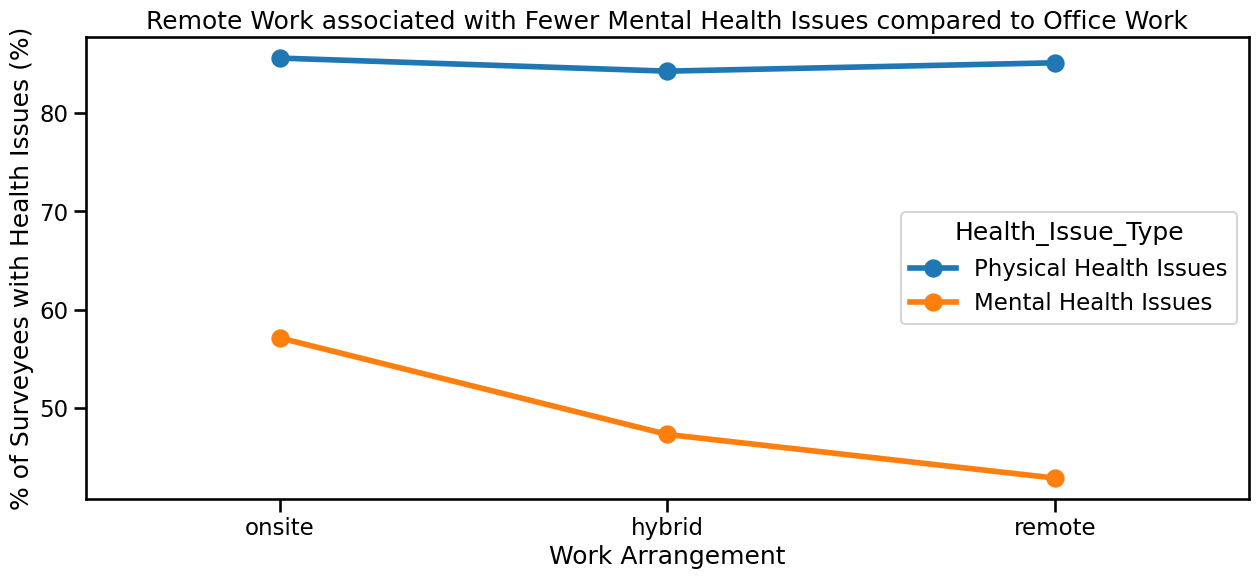

                  Physical Health Issues  Mental Health Issues
Work_Arrangement                                              
onsite                             85.60                 57.12
hybrid                             84.27                 47.30
remote                             85.12                 42.86


In [261]:
health_comparison = df_cleaned.groupby("Work_Arrangement").agg({
    "Physical_Health_Issues_Binary": lambda x: round((x == 1).sum() / len(x) * 100, 2),
    "Mental_Health_Issues_Binary": lambda x: round((x == 1).sum() / len(x) * 100,2),
})

health_comparison.columns = ["Physical Health Issues", "Mental Health Issues"]

health_comparison_melted = health_comparison.reset_index().melt(
    id_vars = "Work_Arrangement",
    var_name = "Health_Issue_Type",
    value_name = "Percentage"
)

plt.figure(figsize=(15,6))
sns.pointplot(x = "Work_Arrangement", y = "Percentage", data = health_comparison_melted,
              hue = "Health_Issue_Type", order = ["onsite", "hybrid", "remote"])
plt.xlabel("Work Arrangement")
plt.ylabel("% of Surveyees with Health Issues (%)")
plt.title("Remote Work associated with Fewer Mental Health Issues compared to Office Work")
plt.show()

print(health_comparison.sort_values("Mental Health Issues", ascending= False))

### Key Findings 

**Correlation between Work Arrangement and Mental Health Issues**: Respondents who worked remotely reported the best mental health outcomes (42.86%), with a 14.3 percentage point reduction in mental health issues compared to onsite workers (57.12%). A clear trend emerges showing reduced prevalence of mental health issues: Onsite (57.12%) -> Hybrid (47.30%) -> Remote (42.86%), with remote work delivering a 25% relative improvement in mental health outcomes.

**Physical Health Issues remain consistently high**: Regardless of work arrangement (Onsite, Hybrid or Remote), about 84-85% of respondents reported physical health issues with no significant difference. This indicates that work arrangement has minimal impact on physical health outcomes.

### Analysis of Work Arrangement on Wellbeing based on Industry

/var/folders/7t/qj85ttzs5jzfv55wltyfltvw0000gn/T/ipykernel_87209/2138100209.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mental_health_by_industry = df_cleaned.groupby(["Industry", "Work_Arrangement"])["Mental_Health_Issues_Binary"].apply(


Work_Arrangement       onsite  hybrid  remote
Industry                                     
academic                25.00    0.00   66.67
consulting              21.74   11.76   22.45
customer service        66.34   66.67   66.67
education               51.42   41.67   37.50
finance                 58.33   42.93   39.77
government              31.25   29.17   28.95
healthcare              58.20   44.60   33.94
manufacturing           52.87   52.33   46.20
marketing               71.77   64.06   57.89
media                   26.67   24.14   18.92
non-profit              20.51   20.97   33.33
professional services   65.39   63.45   65.00
retail                  51.37   40.00   41.86
technology              52.70   48.37   47.77


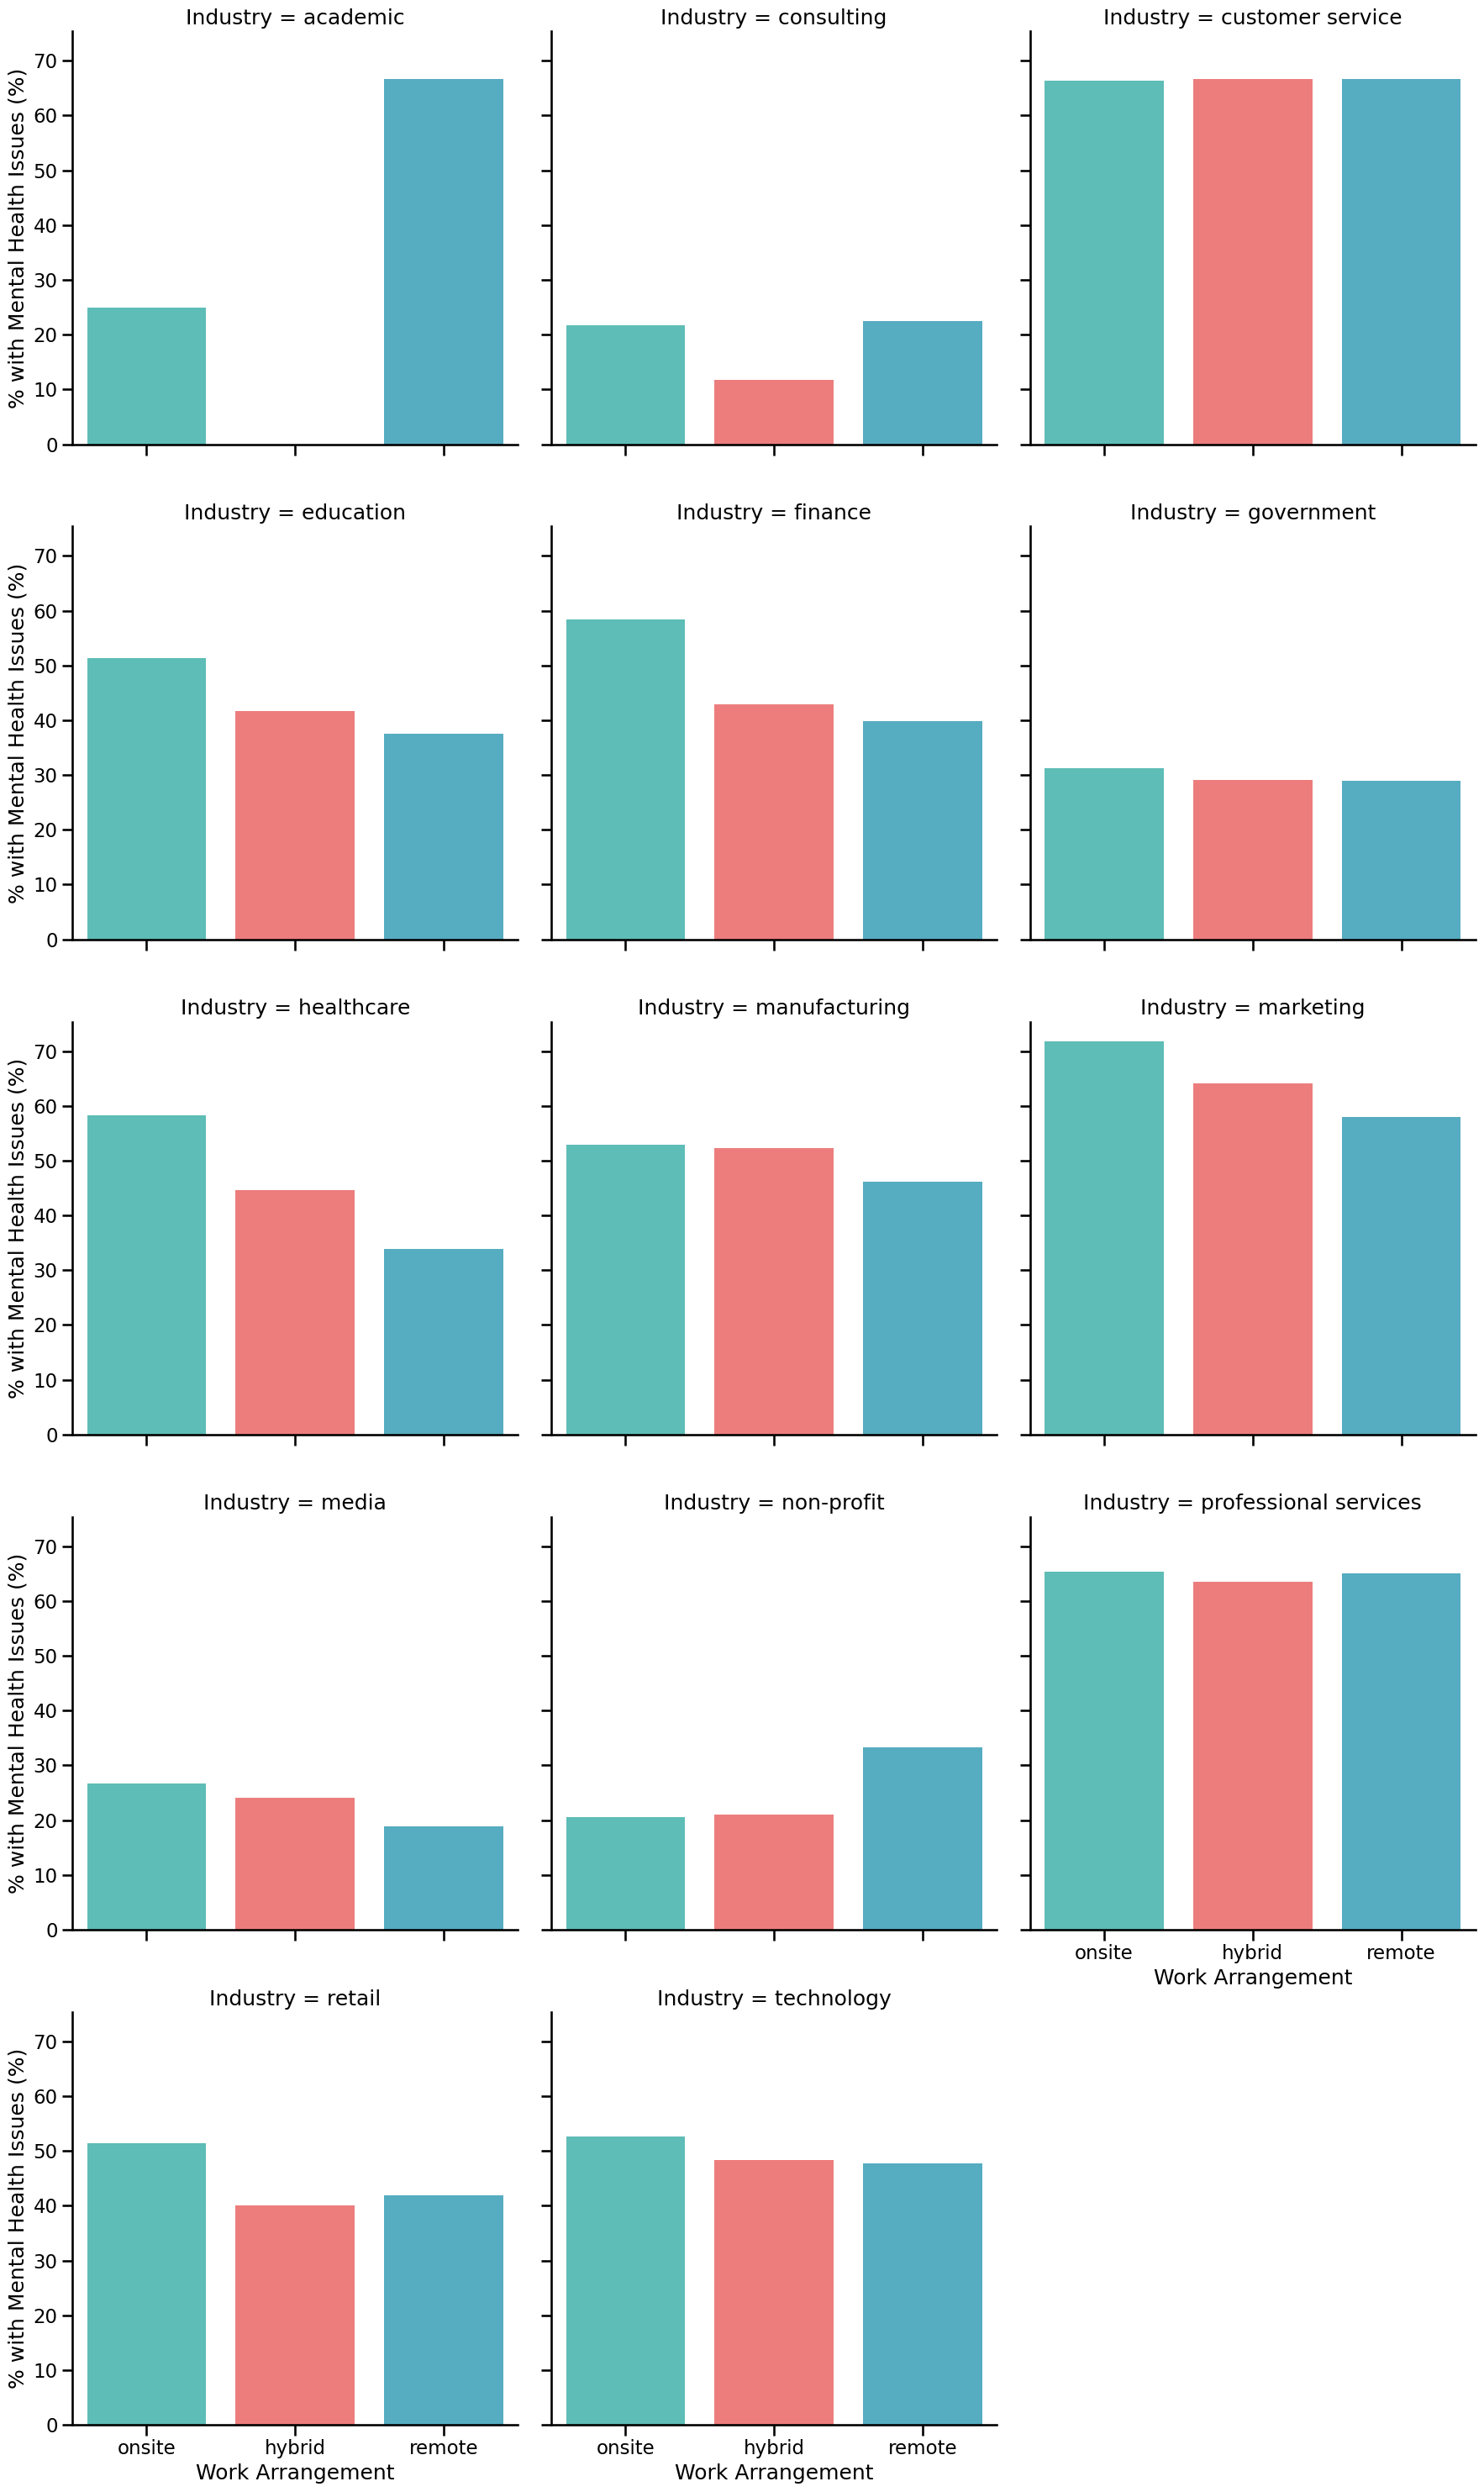

In [262]:
mental_health_by_industry = df_cleaned.groupby(["Industry", "Work_Arrangement"])["Mental_Health_Issues_Binary"].apply(
    lambda x: round((x == 1).sum()/ len(x) * 100, 2)
).reset_index()

mental_health_by_industry.columns = ["Industry", "Work_Arrangement", "Percentage"]

mental_health_by_industry_plot  = sns.catplot(kind = "bar", data = mental_health_by_industry, 
                        x = "Work_Arrangement", y = "Percentage", col = "Industry", col_wrap= 3, height = 6,
                        palette=['#FF6B6B', '#4ECDC4', '#45B7D1'], hue="Work_Arrangement", legend = False,
                        order = ["onsite", "hybrid", "remote"] )
mental_health_by_industry_plot.set_axis_labels("Work Arrangement","% with Mental Health Issues (%)")

mental_health_by_industry_table = mental_health_by_industry.pivot(
    index = "Industry",
    columns = "Work_Arrangement",
    values = "Percentage"
)
mental_health_by_industry_table = mental_health_by_industry_table[["onsite", "hybrid", "remote"]]

print(mental_health_by_industry_table)
plt.show()

The aforementioned trend where remote work shows a significant decrease in percentage point in mental health issues do not apply across all industries. 

**Remote Work associated with Increased Prevalence of Mental Health Issues in Academic and Non-Profit Sector**:
The percentage point of mental health issues for Remote workers (66.67%) is almost 1.7 times higher than Onsite workers (25.00%) in the Academic sector. Similarly, Remote workers in non-profit sectors (33.33%) have reported 60% higher incidences mental health issues compared to their onsite and hybrid counterparts (approximately 21%). This indicates that remote wor may not be the best option for employees in these industries.

**Healthcare and Finance Sectors benefit the most with Remote Work**: 
Jobs in the healthcare sector show the strongest protective effect, with reported mental health issues dropping from 58.20% (onsite) to 33.94% (remote), citing about a 40% improvement in mental health outcomes. Similarly, jobs in the finance sector show notable decline from 58.33% (onsite) to 39.77% (remote), which is a reasonable 30% decrease in reported mental health issues. 

**Consistently high mental health issues in Professional Services and Customer Service Industry**:
These industries show a high percentage point of reported mental health issues regardless of work arrangement (66% in Customer Service, 63-65% in Professional Services). Therefore, it is of utmost importance to relay mental health resources and better mental health support programmes for employees in these sectors.

For the other industries, remote work shows only a minimal decrease in reported mental health cases compared to onsite work, with hybrid work serving as a middle ground between both categories.

/var/folders/7t/qj85ttzs5jzfv55wltyfltvw0000gn/T/ipykernel_87209/3681096805.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  physical_health_by_industry = df_cleaned.groupby(["Industry", "Work_Arrangement"])["Physical_Health_Issues_Binary"].apply(


Work_Arrangement       onsite  hybrid  remote
Industry                                     
academic                75.00  100.00  100.00
consulting              56.52   70.59   81.63
customer service        91.09   97.92   88.89
education               88.21   88.33   80.83
finance                 84.92   79.35   89.77
government              68.75   66.67   73.68
healthcare              81.48   87.77   84.40
manufacturing           85.99   83.42   87.34
marketing               91.94   92.19   94.74
media                   80.00   79.31   72.97
non-profit              58.97   69.35   75.64
professional services   91.01   89.34   90.00
retail                  81.51   83.16   82.56
technology              82.43   84.24   86.94


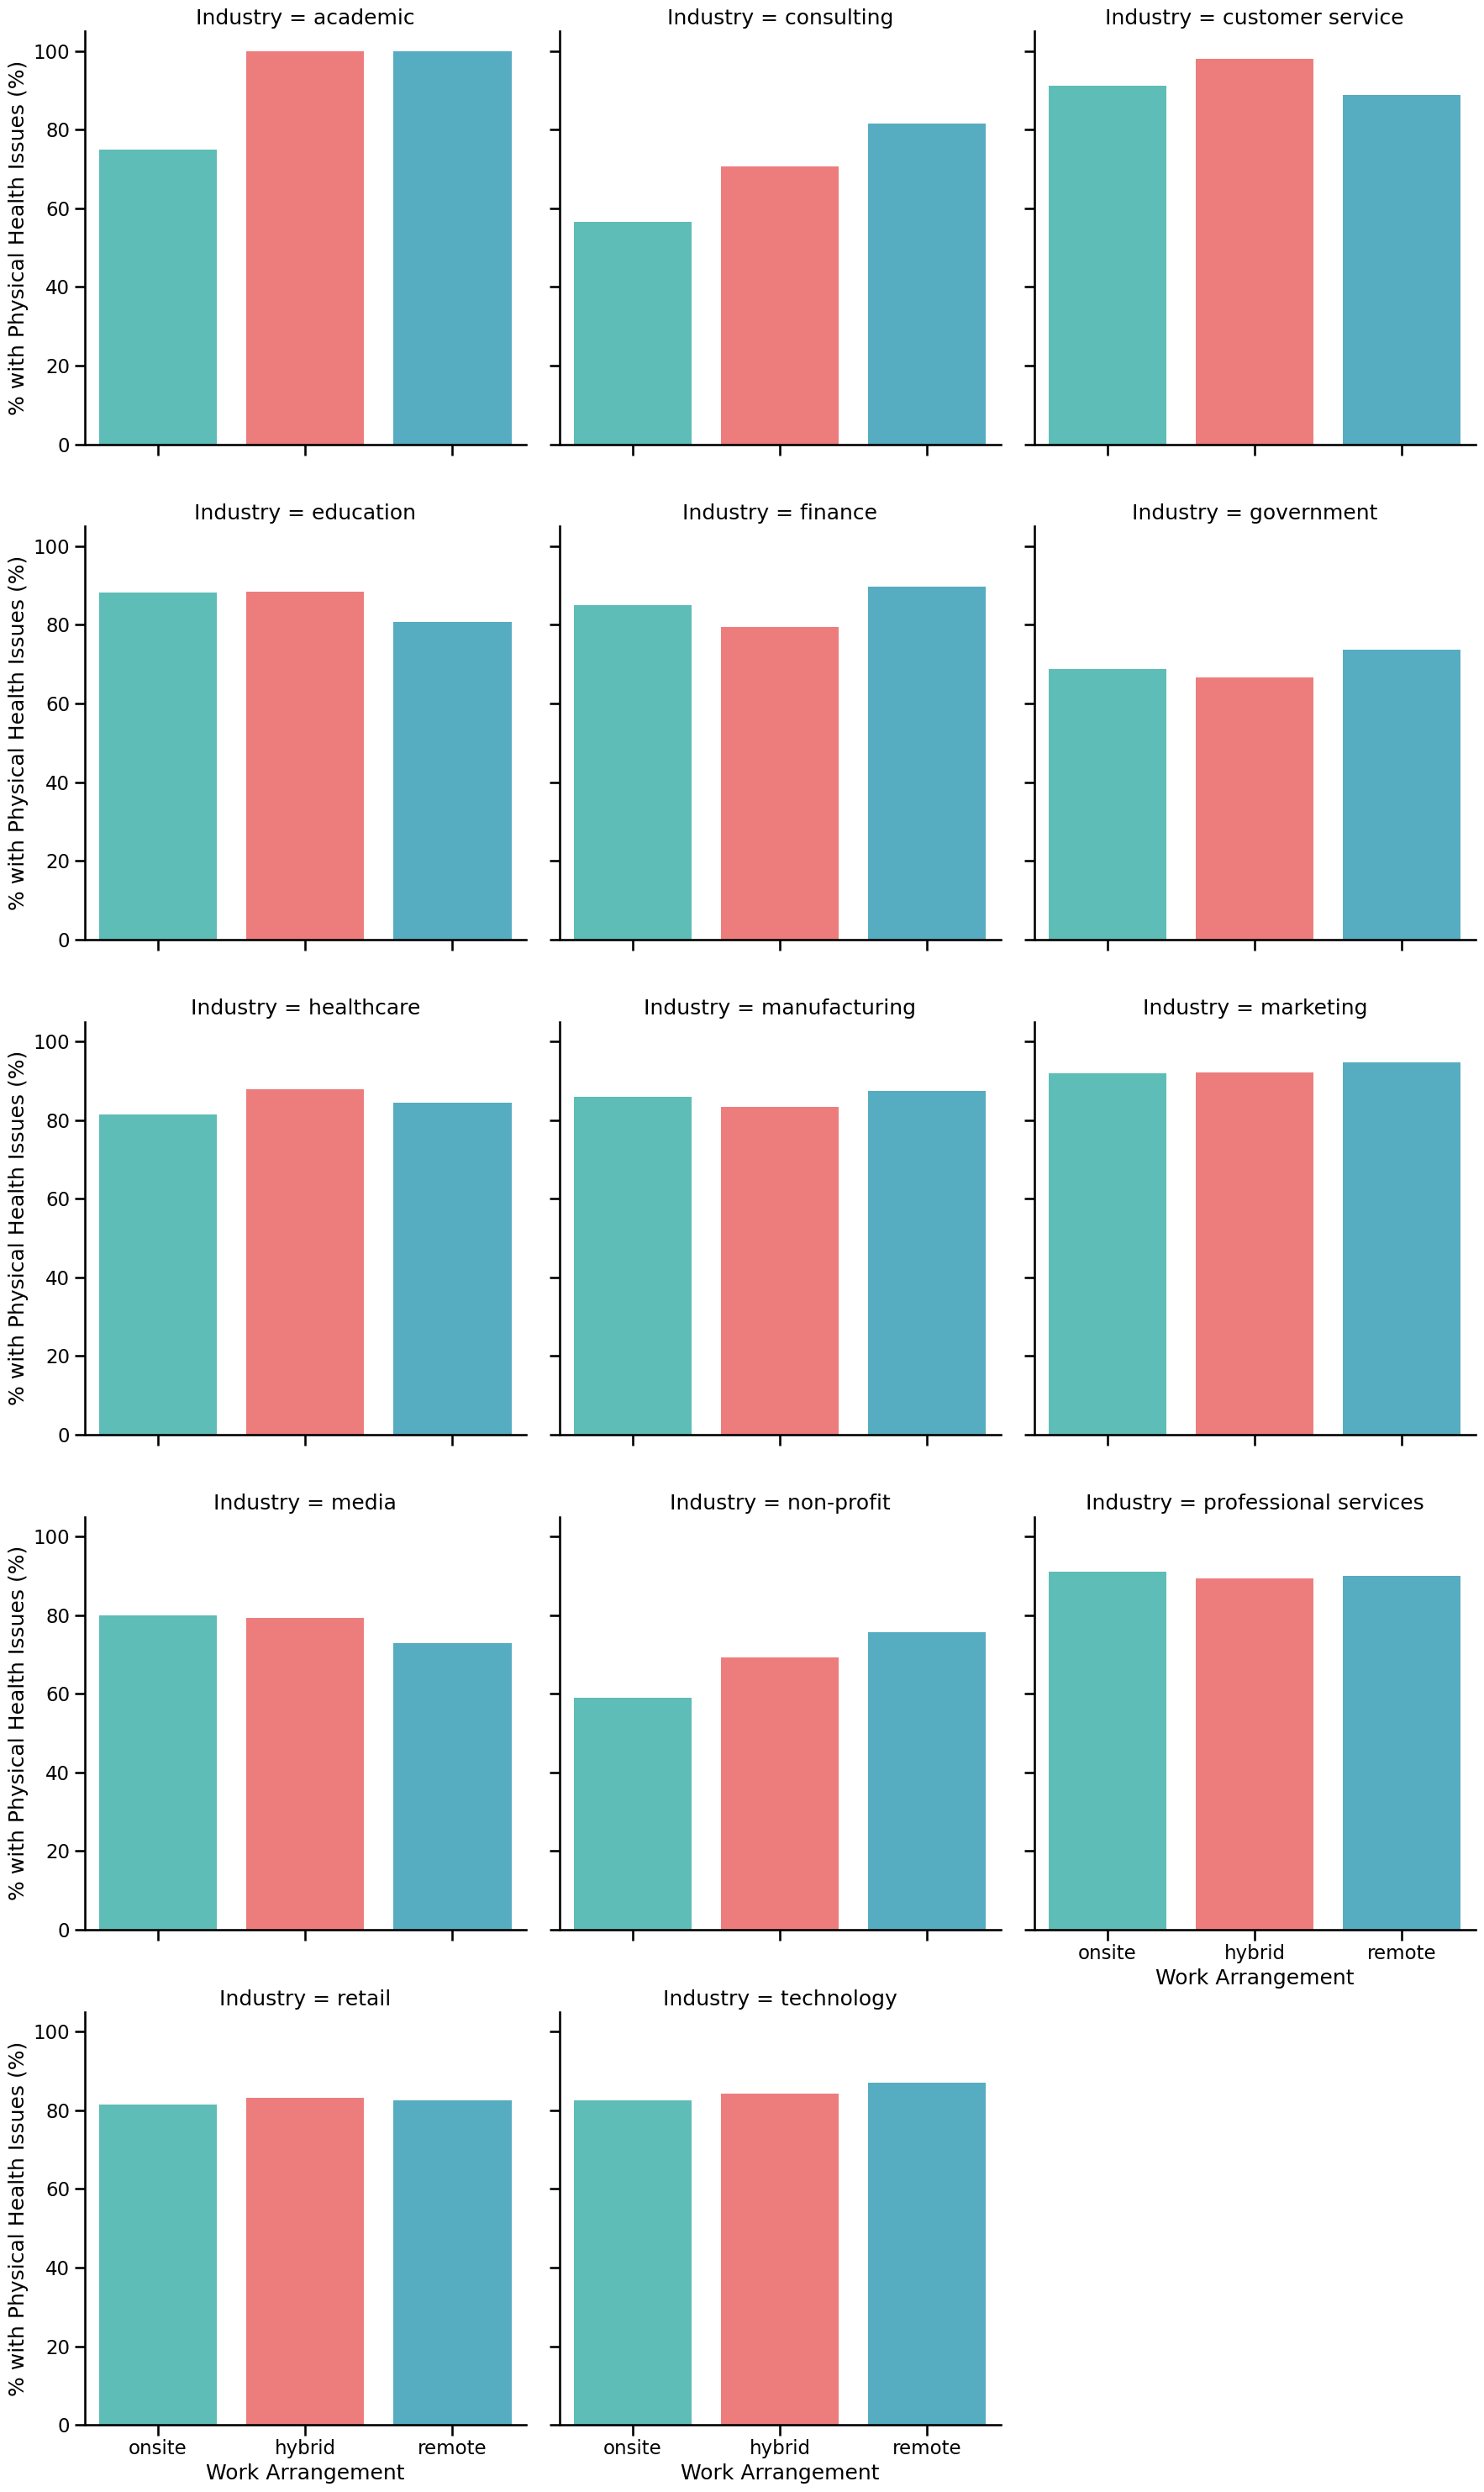

In [263]:
physical_health_by_industry = df_cleaned.groupby(["Industry", "Work_Arrangement"])["Physical_Health_Issues_Binary"].apply(
    lambda x: round((x == 1).sum()/ len(x) * 100, 2)
).reset_index()

physical_health_by_industry.columns = ["Industry", "Work_Arrangement", "Percentage"]

physical_health_by_industry_plot  = sns.catplot(kind = "bar", data = physical_health_by_industry, 
                        x = "Work_Arrangement", y = "Percentage", col = "Industry", col_wrap= 3, height = 6,
                        palette=['#FF6B6B', '#4ECDC4', '#45B7D1'], hue="Work_Arrangement", legend = False,
                        order = ["onsite", "hybrid", "remote"] )
physical_health_by_industry_plot.set_axis_labels("Work Arrangement","% with Physical Health Issues (%)")

physical_health_by_industry_table = physical_health_by_industry.pivot(
    index = "Industry",
    columns = "Work_Arrangement",
    values = "Percentage"
)
physical_health_by_industry_table = physical_health_by_industry_table[["onsite", "hybrid", "remote"]]

print(physical_health_by_industry_table)
plt.show()

There is no consistent trend in how work arrangement affects reported physical health issues across industries, which justifies the trend mentioned in the pointplot that the incidence of physical health issues is unlikely to be influenced by work arrangment. However, there seems to be certain trends in specific industries that are a cause for concern.

**Academic and Consulting Sector shows Deteriorating Physical Health with lesser Onsite Work**:
Hybrid and Remote workers in the academic sector (100%) have a 33% higher incidences of reported physical health issues compared to onsite workers (75%). In the consulting sector, hybrid (70.59%) and remote workers (81.63%) have reported a 24.9% and 44.4% increase in reported physical health issues compared to office workers.

**Consistently High Number of Physical Health Issues across Industries**:
The prevalence of physical health issues across industries is high, ranging from 56% to 100%. Most of these industries (Customer Service, Education, Healthcare, Manufacturing, Marketing, Professional Services, Retail and Tech) have reported at least 80% of their employees experience physical health issues regardless of their work arrangement.

The prevalence of physical health issues regardless of work arrangement implies that these health challenges are more related to job characteristics instead of work location. Remote work exacerbates physical health problems and hybrid work does not seem to provide consistent benefits across industries. This highlights the need for comprehensive ergonomic support to be provided for all workers, and workplace wellness programs should be put in place to promote movement and better workplace setup regardless of their working arrangement.

### Analysis of Work Life Balance across Work Arrangement and Regions

/var/folders/7t/qj85ttzs5jzfv55wltyfltvw0000gn/T/ipykernel_87209/2268576231.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  high_burnout_pct = high_burnout.groupby(['Region', 'Work_Arrangement']).size() / df_cleaned.groupby(['Region', 'Work_Arrangement']).size() * 100
/var/folders/7t/qj85ttzs5jzfv55wltyfltvw0000gn/T/ipykernel_87209/2268576231.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  high_burnout_pct = high_burnout.groupby(['Region', 'Work_Arrangement']).size() / df_cleaned.groupby(['Region', 'Work_Arrangement']).size() * 100


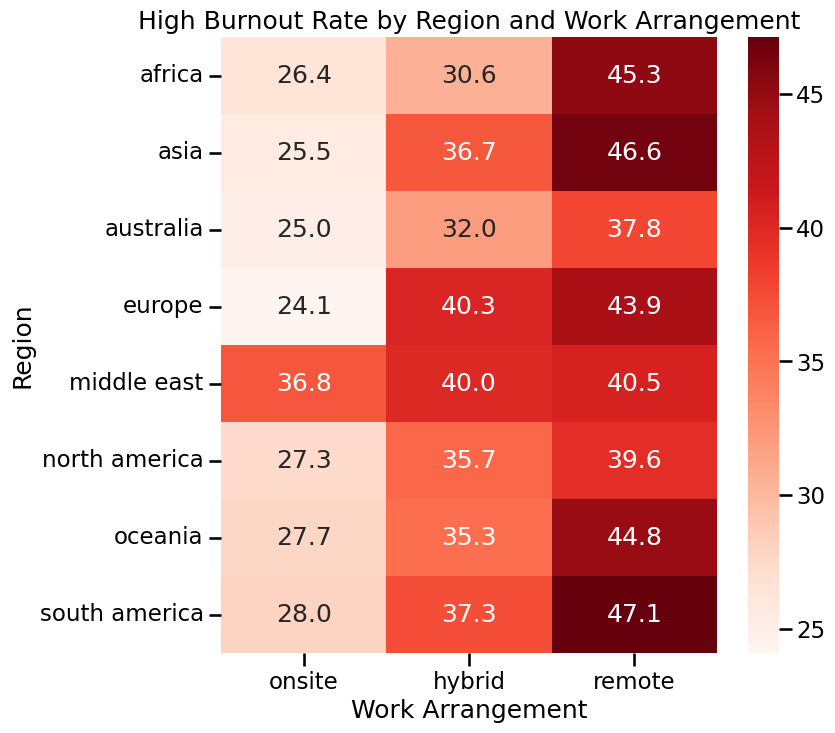

In [264]:
high_burnout = df_cleaned[df_cleaned['Burnout_Level'] == 'high']
high_burnout_pct = high_burnout.groupby(['Region', 'Work_Arrangement']).size() / df_cleaned.groupby(['Region', 'Work_Arrangement']).size() * 100
high_burnout_pct = high_burnout_pct.unstack()

high_burnout_pct = high_burnout_pct[["onsite", "hybrid", "remote"]]

plt.figure(figsize=(8,8))
sns.heatmap(data = high_burnout_pct, annot = True, fmt = ".1f", cmap = "Reds")
plt.xlabel("Work Arrangement")
plt.title("High Burnout Rate by Region and Work Arrangement")
plt.show()

**Remote Work creates Significant Burnout Risk in Developing Regions**:
Africa (45.3%), Asia (46.6%) and South America (47.1%) show the highest burnout rates for remote work arrangements, which is a 19-20 percentage point increase compared to onsite work. These regions likely lack remote work infrastructure and support systems, which could have attributed to high burnout rates.

**Developed Regions handle Remote Work Better**:
North America (39.6%) and Australia (37.8%) show the lowest remote work burnout rates, which suggests better remote work infrastructure and technology compared to the developing counterparts. Although the risk is still elevated compared to onsite work, the increase is more manageable.

**Middle East is a High-Risk Region**:
Burnout rates regardless of work arrangement are consistently high (36.8-40.5%), which indicate systemic workplace cultures that are beyond work location. There needs to be a comprehensive organization intervention to address the burnout risk of employees in the region apart from changes in work arrangement.

**Onsite Work provides consistently lower Burnout Risk**:
Apart from Middle East, the other regions show a consistently low onsite burnout risk (24-28%).

There is no one-size-fits-all approach to address severe burnout from work. Hence, there is a need to account for regional infrastructure, workplace dynamics and culture, as well as employee support systems across various regions to find a suitable solution to protect the wellbeing of employees.

### Relationship between Work-Life Balance and Working Hours by Work Arrangement

Work_Arrangement  hybrid  onsite  remote
Hours_Binned                            
<35                 3.62    3.25    3.99
35-39               3.29    3.19    3.65
40-44               3.30    3.23    3.67
45-49               3.02    3.16    3.37
50-54               3.12    2.96    3.51
55-59               3.07    2.89    3.23
>60                 3.06    3.13    3.05


/var/folders/7t/qj85ttzs5jzfv55wltyfltvw0000gn/T/ipykernel_87209/3089338139.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  scores_across_binned_hours = df_cleaned.groupby(["Work_Arrangement", "Hours_Binned"])["Work_Life_Balance_Score"].apply(lambda x: round(np.mean(x), 2)).reset_index()


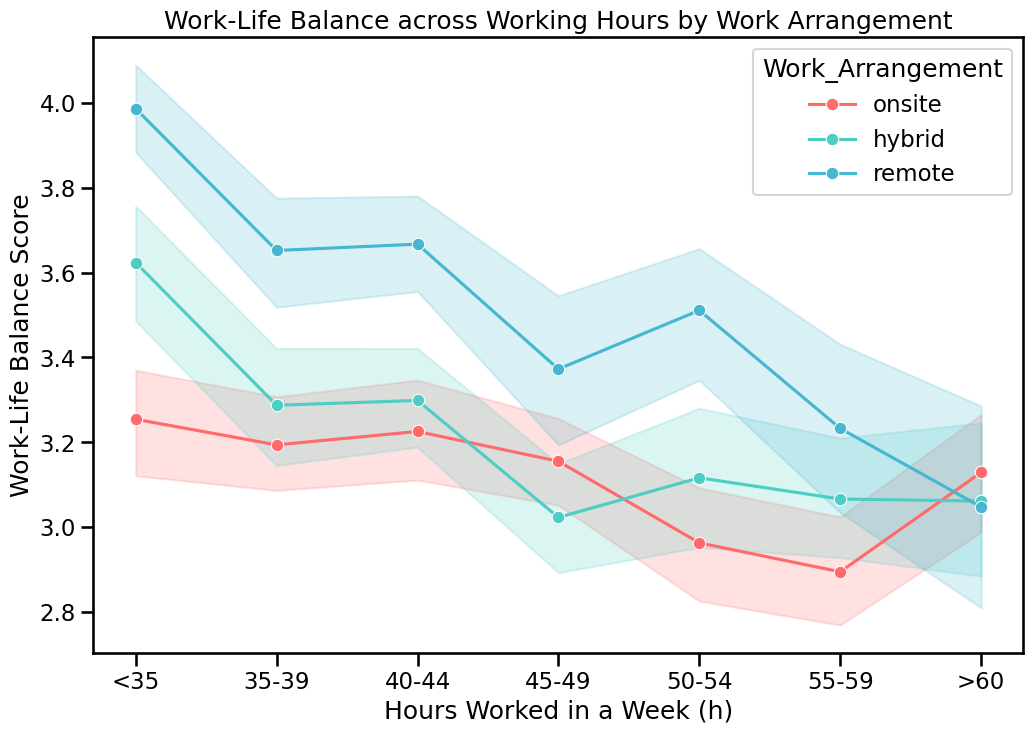

In [265]:
df_cleaned["Hours_Binned"] = pd.cut(df_cleaned["Hours_Per_Week"], 
                                    bins = [0, 35, 40, 45, 50, 55, 60, np.inf], 
                                    labels = ["<35", "35-39", "40-44", "45-49","50-54", "55-59", ">60"])

plt.figure(figsize= (12,8))
sns.lineplot(data = df_cleaned, x = "Hours_Binned", y = "Work_Life_Balance_Score",
             hue = "Work_Arrangement", marker = 'o',
             hue_order= [ "onsite", "hybrid", "remote"],
             palette=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.xlabel("Hours Worked in a Week (h)")
plt.ylabel("Work-Life Balance Score")
plt.title("Work-Life Balance across Working Hours by Work Arrangement")

scores_across_binned_hours = df_cleaned.groupby(["Work_Arrangement", "Hours_Binned"])["Work_Life_Balance_Score"].apply(lambda x: round(np.mean(x), 2)).reset_index()
scores_across_binned_hours = scores_across_binned_hours.pivot(index = "Hours_Binned", columns = "Work_Arrangement", values = "Work_Life_Balance_Score")

print(scores_across_binned_hours)
plt.show()

**Remote Work associated with the Best Work-Life Balance at Reasonable Hours**:
Remote workers who work less than 35 hours a week have the highest work-life balance score of 3.99, scoring 23% better than onsite workers. Scores remain consistently superior compared to hybrid and onsite workers up until 45 hours a week. 

**Work-Life Balance is heavily disrupted above 50 hour work weeks**:
All three working arrangements converge towards poor work-life balance when the number of working hours per week exceeds 50. For remote work, scores decline rapidly by 13%, from 3.51 (50-54h) to 3.05 (>60h+). Hybrid work arrangements score between 3.06-3.12, and onsite workers hit their lowest point of 2.96 at 55-59h.

**45 hour work weeks are the threshold for optimal work life balance**:
The 45h-49h work week marks the turning point where work life balance scores for remote workers start plummeting. The gap in scores between remote work and hybrid and onsite workers start to narrow past this point. After 50 hours, work arrangement becomes irrelevant as work-life balance is heavily disrupted. 

These findings suggest that remote work would be the most optimal for work-life balance of employees. Although certain job roles cannot be performed remote, adopting a hybrid working arrangement should be considered before resorting to onsite work arrangements. Nonetheless, to protect the work-life balance of employees regardless of working arrangement, it is best to cap working hours at 45 hours per week.

### Relationship between Social Isolation and Working Hours by Work Arrangement

/var/folders/7t/qj85ttzs5jzfv55wltyfltvw0000gn/T/ipykernel_87209/2091680899.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  scores_across_binned_hours = df_cleaned.groupby(["Work_Arrangement", "Hours_Binned"])["Social_Isolation_Score"].apply(lambda x: round(np.mean(x), 2)).reset_index()


Work_Arrangement  hybrid  onsite  remote
Hours_Binned                            
<35                 3.19    2.74    4.07
35-39               3.01    2.39    3.90
40-44               2.93    2.47    3.86
45-49               2.87    2.43    3.87
50-54               2.99    2.43    3.71
55-59               2.86    2.45    3.64
>60                 2.75    2.20    3.57


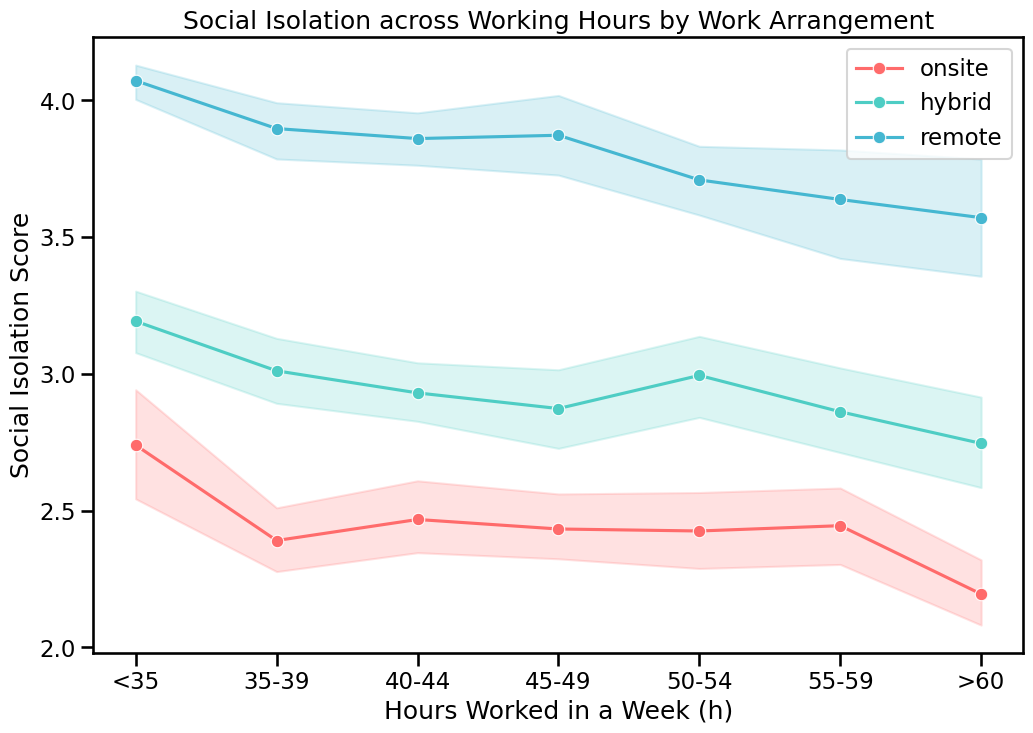

In [266]:
df_cleaned["Hours_Binned"] = pd.cut(df_cleaned["Hours_Per_Week"], 
                                    bins = [0, 35, 40, 45, 50, 55, 60, np.inf], 
                                    labels = ["<35", "35-39", "40-44", "45-49","50-54", "55-59", ">60"])

plt.figure(figsize= (12,8))
sns.lineplot(data = df_cleaned, x = "Hours_Binned", y = "Social_Isolation_Score",
             hue = "Work_Arrangement", marker = 'o',
             hue_order= [ "onsite", "hybrid", "remote"],
             palette=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.xlabel("Hours Worked in a Week (h)")
plt.ylabel("Social Isolation Score")
plt.legend(loc = "upper right")
plt.title("Social Isolation across Working Hours by Work Arrangement")

scores_across_binned_hours = df_cleaned.groupby(["Work_Arrangement", "Hours_Binned"])["Social_Isolation_Score"].apply(lambda x: round(np.mean(x), 2)).reset_index()
scores_across_binned_hours = scores_across_binned_hours.pivot(index = "Hours_Binned", columns = "Work_Arrangement", values = "Social_Isolation_Score")

print(scores_across_binned_hours)
plt.show()

**Remote Work associated with highest Social Isolation**:
There is a distinct range of social isolation scores for each work arrangement with no overlaps. Remote workers consistently have the highest social isolation scores across all working hours (3.57-4.07), followed by hybrid work arrangements (2.75-3.19) and then onsite work arrangements (2.20-2.74).

**Work Arrangement as the primary driver of Social Isolation**:
Across all working hours, social isolation scores remain relatively stable across all work arrangements. This suggests that work arrangement itself is the primary driver of perceived social isolation, not the number of working hours per week. More notably, social isolation seems to sharply increase from hybrid to remote work, whereas the difference between onsite and hybrid is more gradual.

These findings suggest that remote work, while offering autonomy and a great amount of flexibility for its employees, also comes at a cost of reduced interpersonal interactions. This is often exacerbated in prolonged or full-remote setups where employees have lesser opportunities to interact with one another. Organizations may need to implement deliberate strategies to foster social cohesion in distributed teams.